In [34]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "./PastHires.csv"
df = pd.read_csv(input_file, header=0)

In [35]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [36]:
d = {'Y': 1, 'N': 0}
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Hired'] = df['Hired'].map(d)

d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [37]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [44]:
y = df['Hired']
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

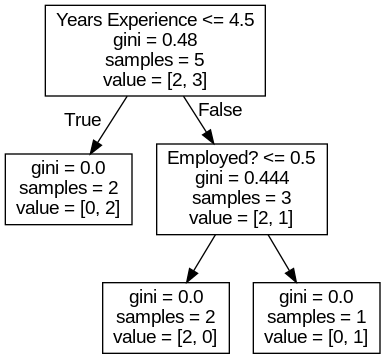

In [46]:
from IPython.display import Image
from six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png())

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

print(clf.predict([[10, 1, 4, 0, 0, 0]]))

[1]


/home/gabrielspacki/lamia-bootcamp/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
